In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



In [7]:
import pandas as pd
data1=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [8]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data1.shape

(891, 12)

In [11]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization 
Survived

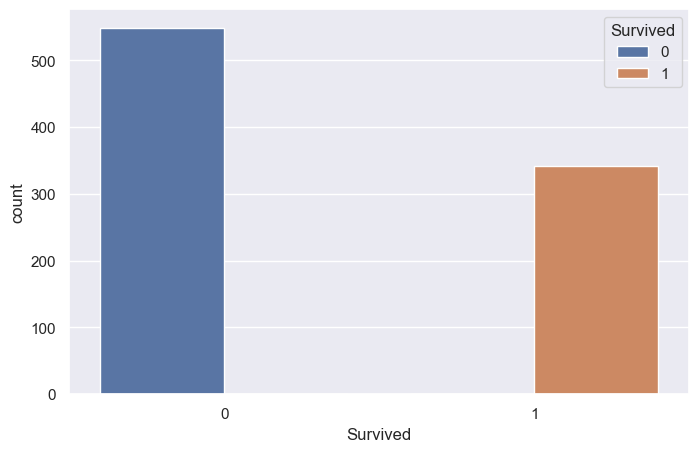

In [16]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Survived',hue="Survived", data=data1)

# sex

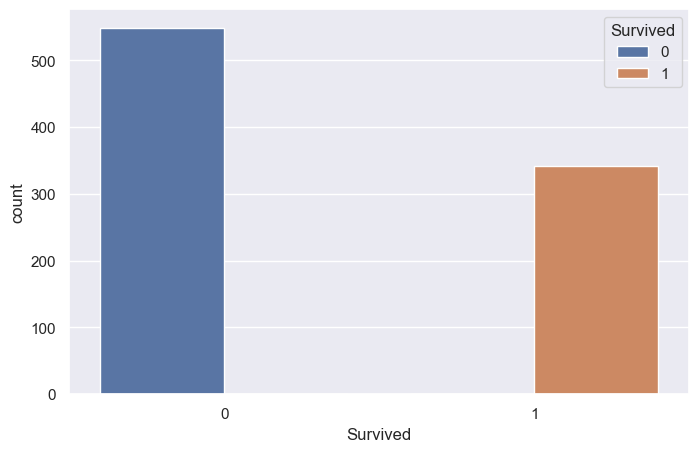

In [17]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Survived',hue="Survived",data=data1)

# Pclass

In [18]:
group=data1.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()

<Axes: xlabel='Survived', ylabel='Pclass'>

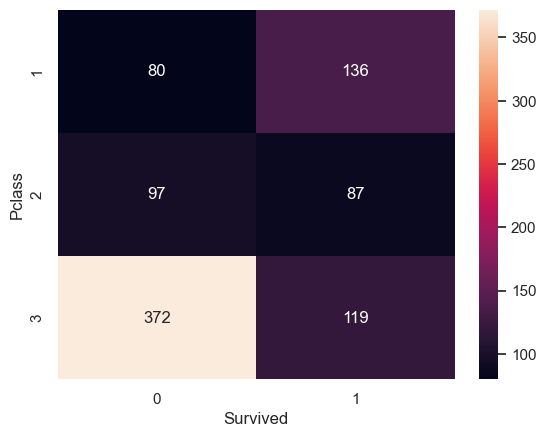

In [21]:
sns.heatmap(pclass_survived,annot=True,fmt="d")

# Survived Coulumns (sex vs age)

<Axes: xlabel='Sex', ylabel='Age'>

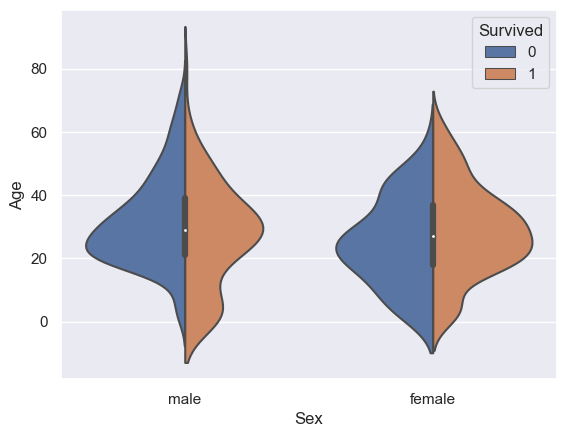

In [19]:
import seaborn as sns
sns.violinplot(x="Sex",y="Age", hue="Survived",data = data1,split= True)

# Embarked

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


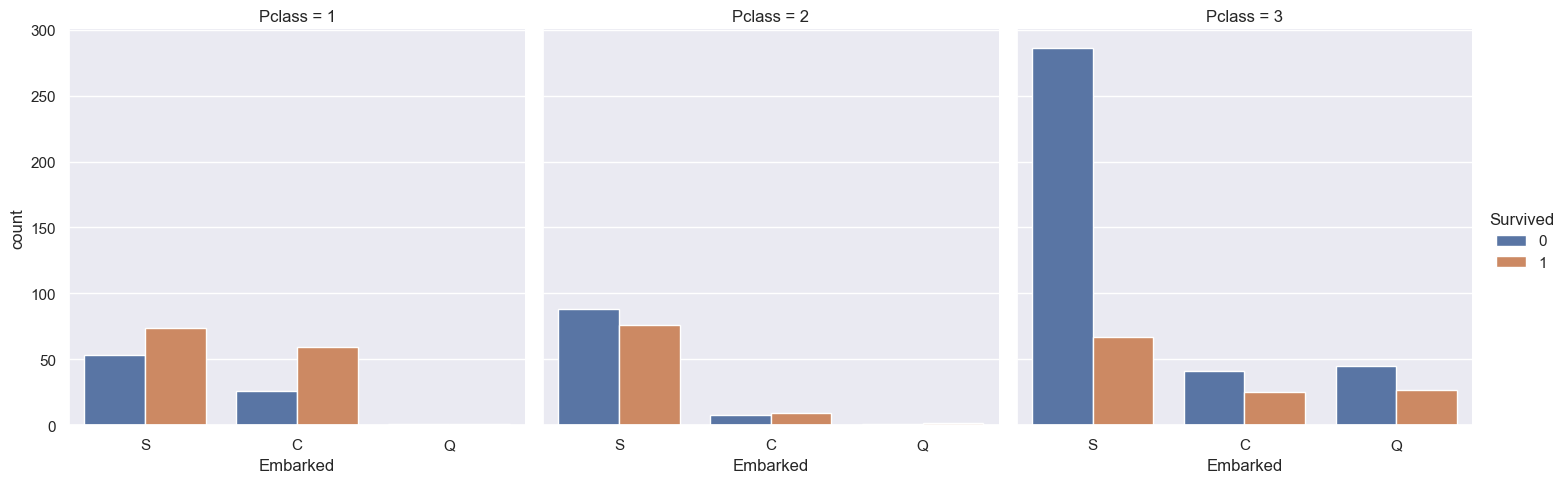

In [36]:
sns.catplot(x='Embarked',hue='Survived',kind='count',col='Pclass', data=data1)

# Fare

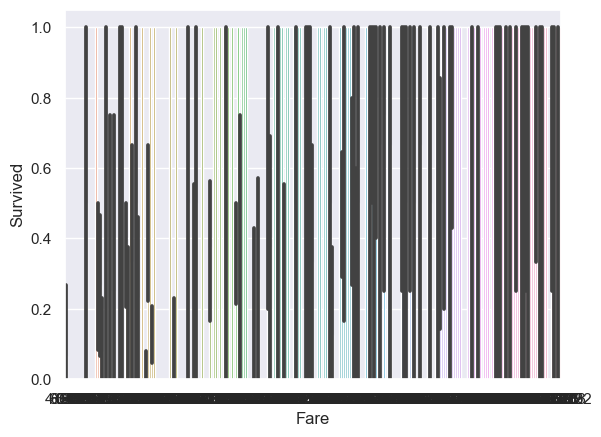

In [48]:
ax=sns.barplot(x="Fare",y="Survived",estimator='mean',errorbar=('ci', 95), n_boot=500, saturation=0.75, fill=True,data=data1)

In [49]:
print(data1[["Sex","Survived"]].groupby(["Sex"],as_index= False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [50]:
print(data1[["Pclass","Survived"]].groupby(["Pclass"],as_index= False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [51]:
print(data1[["Embarked","Survived"]].groupby(["Embarked"],as_index= False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [58]:
print(data1[["Fare","Survived"]].groupby(["Fare"],as_index= False).mean())

              Fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


# Clean Embarked

In [60]:
print("Southampton(S):")
Southampton=data1[data1['Embarked']=='S'].shape[0]
print(Southampton)

print("Cherbourg(c):")
cherbourg=data1[data1['Embarked']=='C'].shape[0]
print(cherbourg)

print("Quenstown(Q):")
queenstown=data1[data1['Embarked']=='Q'].shape[0]
print(queenstown)


Southampton(S):
644
Cherbourg(c):
168
Quenstown(Q):
77


# Name of survived

In [63]:
data1[['Name','Survived']].groupby(['Name'],as_index=False).mean()

,Name,Survived
0,"Abbing, Mr. Anthony",0.0
1,"Abbott, Mr. Rossmore Edward",0.0
2,"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
3,"Abelson, Mr. Samuel",0.0
4,"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...,...
886,"de Mulder, Mr. Theodore",1.0
887,"de Pelsmaeker, Mr. Alfons",0.0
888,"del Carlo, Mr. Sebastiano",0.0
889,"van Billiard, Mr. Austin Blyler",0.0
